# Análise de dados: Orçamento de redes sociais x vendas

Este é um projeto que envolve machine learning para análise de dados de marketing, orçamentos(budget) de redes sociais e a relação com as vendas geradas, os dados foram disponibilizados na plataforma [Kaggle](https://www.kaggle.com/datasets/fayejavad/marketing-linear-multiple-regression).

Sobre o conjunto de dados será adota a seguinte interpretação, a cada rede/mídia social das colunas 'youtube', 'facebook' e 'newspaper' é destinado um orçamento(budget) de marketing, sendo a que coluna 'sales' representa as vendas, o retorno do investimento em marketing.

## 📃 Demanda da análise

- Analisar a correlação dos orçamentos(budgets) com as vendas(sales)
- Gerar um modelo preditivo para relação de orçamento e vendas
  
## 📋 Tópicos da análise

1. Análise das medidas estatísticas dos dados
2. Distribuição do budget entre as mídias e os valores de vendas
3. Correlação entre as variáveis
4. Criação do modelo de regressão linear múltipla
        1. Preparação dos dados de treino e teste 
        2. Treinamento do modelo
        3. Predições do modelo com dados de treino e teste
        4. Diferença entre dados de teste e dados previstos
        5. Métricas de performance
        6. Previsões com novos dados

## Importação de pacotes

In [1]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from tabulate import tabulate
from statistics import mode

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')


## Carregamento dos dados

In [2]:
# Efetuando limpeza de memória antes do carregamento de dados
gc.collect()

# Caminho do arquivo csv
csv = 'dados/Marketing_Data.csv'

# Criando um dataframe a partir do arquivo csv no diretório dados
df = pd.read_csv(csv, encoding='utf-8', sep=',')


## Detalhes do dataframe

In [3]:
# Informações do dataset como nome das colunas, contagem de linhas, 
# tipo de dados e memória utilizada

df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [4]:
# Amostra de dados do dataframe

df.sample(5)


,youtube,facebook,newspaper,sales
16,210.12,27.00,37.80,17.88
71,266.88,5.16,59.76,14.04
2,135.48,20.88,46.32,14.28
91,169.56,32.16,55.44,18.60
142,197.40,25.08,56.88,17.40


In [5]:
# Quantidade de linhas e colunas

df.shape


(171, 4)

## Verificando e tratando se necessário os tipos de valores

In [6]:
# Identificando os tipos de dados das colunas

df.dtypes


youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

## Verificando e tratando se necessário os valores nulos

In [7]:
# Identificando a quantidade de valores nulos

df.isnull().sum()


youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

## Verificando e tratando se necessário os valores duplicados

In [8]:
# Identificando a quantidade de valores duplicados (True)

df.duplicated(keep='first').value_counts()


False    171
dtype: int64

## 1. Análise das medidas estatísticas dos dados

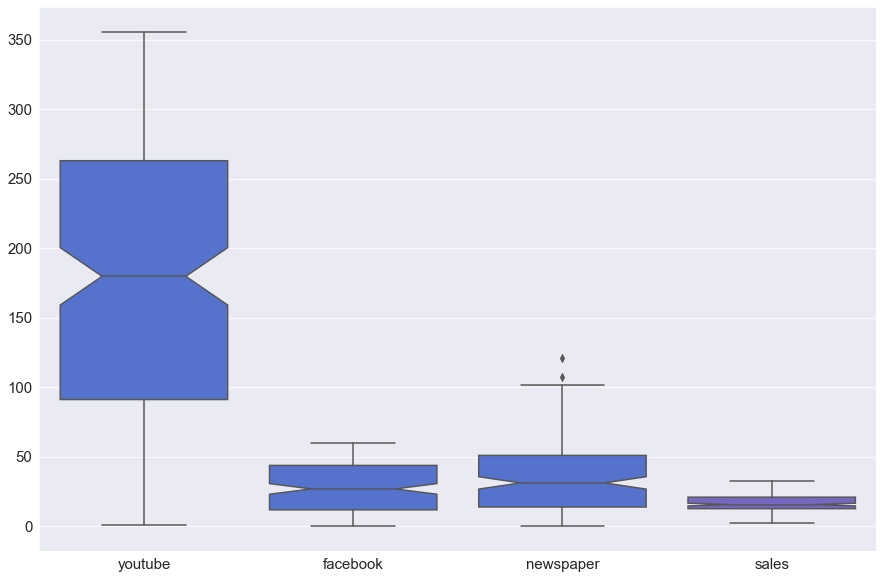

In [9]:
# Gráfico boxplot

plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=df, palette=('royalblue', 'royalblue',
                                   'royalblue', 'slateblue'), notch=True)
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(labelsize=15)
plt.show()


In [10]:
# Descrição dos dados estatísticos

df.describe()


,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


## 2. Distribuição do budget entre as mídias e os valores de vendas

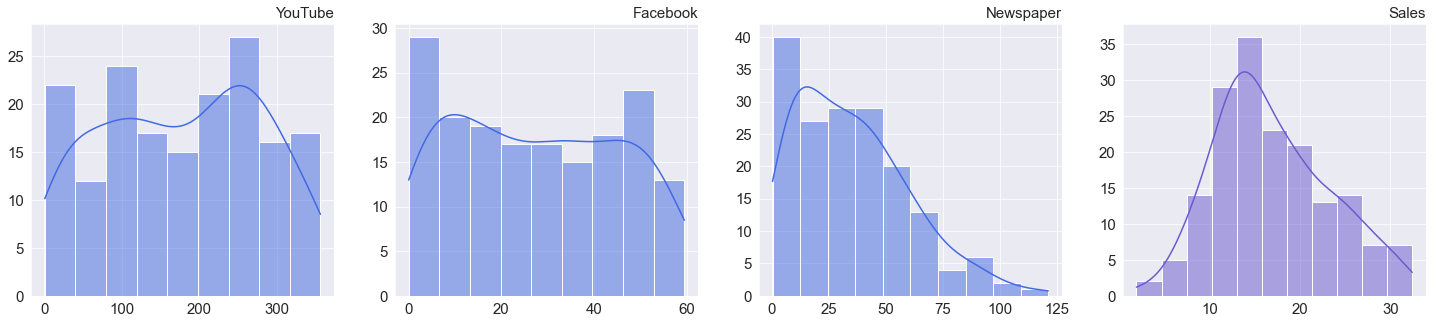

In [11]:
# Função para gerar gráficos histograma
# param1: coluna do dataframe
# param2: nome da coluna
# param3: axis
# param4: cor, defaut: 'royalblue'

def graf_histplot(param1, param2, param3, param4='royalblue'):
    sns.histplot(data=param1, ax=param3, color=param4, kde=True)
    param3.set_ylabel('')
    param3.set_xlabel('')
    param3.tick_params(labelsize=15)
    param3.set_title(param2, loc='right', fontsize=15)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 5))

graf_histplot(df['youtube'], 'YouTube', ax1)
graf_histplot(df['facebook'], 'Facebook', ax2)
graf_histplot(df['newspaper'], 'Newspaper', ax3)
graf_histplot(df['sales'], 'Sales', ax4, 'slateblue')

plt.show()


## 3. Correlação entre as variáveis

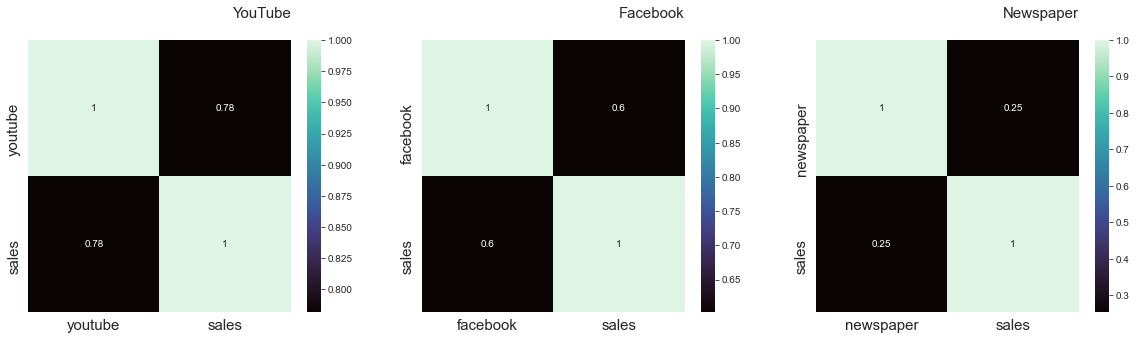

In [12]:
# Função para gerar gráficos heatmap
# param1: correlação
# param2: nome da variável
# param3: axis


def graf_heatmap(param1, param2, param3, param4='royalblue'):
    sns.heatmap(data=param1, ax=param3, annot=True, cmap="mako")
    param3.tick_params(labelsize=15)
    param3.set_title(param2, loc='right', fontsize=15)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

graf_heatmap(df[['youtube', 'sales']].corr(), 'YouTube\n', ax1)
graf_heatmap(df[['facebook', 'sales']].corr(), 'Facebook\n', ax2)
graf_heatmap(df[['newspaper', 'sales']].corr(), 'Newspaper\n', ax3)

plt.show()


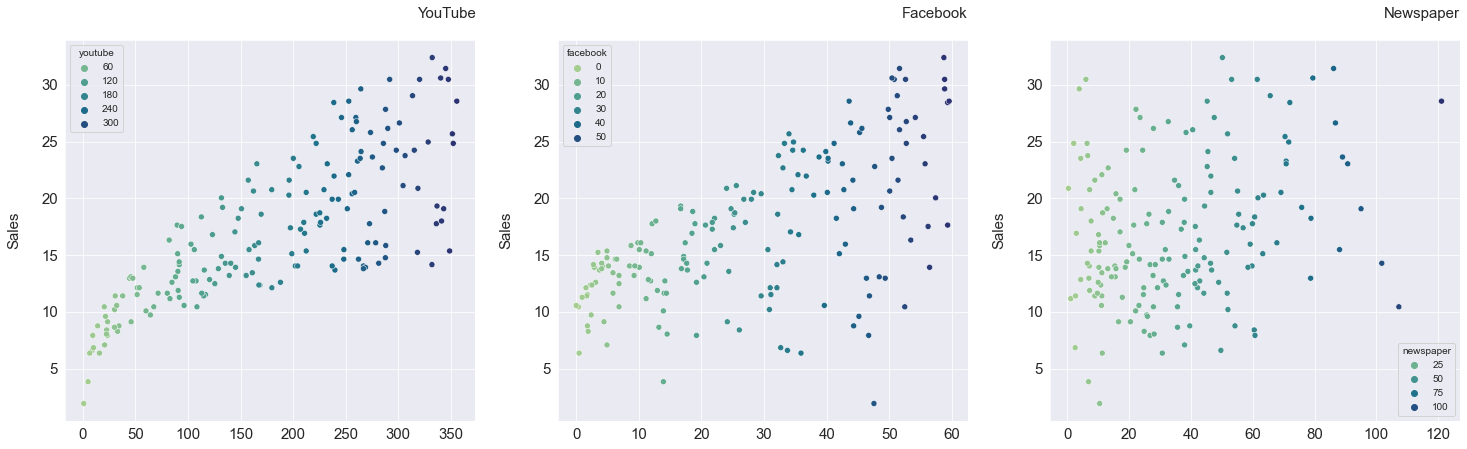

In [13]:
# Função para gerar gráficos scatterplot
# param1: dataframe
# param2: nome da variável independente
# param3: nome da variável dependente
# param4: nome do gráfico(coluna)
# param5: axis


def graf_scatterplot(param1, param2, param3, param4, param5):
    sns.scatterplot(data=param1, x=param2, y=param3,
                    ax=param5, hue=param2, palette='crest')
    param5.set_ylabel('Sales\n', fontsize=15)
    param5.set_xlabel('')
    param5.tick_params(labelsize=15)
    param5.set_title(param4, loc='right', fontsize=15)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 7))

graf_scatterplot(df, df['youtube'], df['sales'], 'YouTube\n', ax1)
graf_scatterplot(df, df['facebook'], df['sales'], 'Facebook\n', ax2)
graf_scatterplot(df, df['newspaper'], df['sales'], 'Newspaper\n', ax3)

plt.show()


## 4. Criação do modelo de regressão linear múltipla

### 1. Preparação dos dados de treino e teste

In [14]:
# features, variáveis independentes
X = df.drop(['sales'], axis=1)

# variável resposta, variável dependente
y = df['sales'].copy()

# definindo o percentual de dados para teste
perc = 0.3

# definindo o random_state
seed = 10

# separação dos dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=perc, random_state=seed)


### 2. Treinamento do modelo

In [15]:
# definição do modelo a ser utilizado nos dados
model = LinearRegression()

# treinamento do modelo
model.fit(x_train, y_train)

# score R^2, coeficiente de determinação, percentual de "explicação" que o 
# modelo é capaz de determinar
print('\nMétrica do modelo com dados de treino')
print('\nScore R^2:', model.score(x_train, y_train) * 100)



Métrica do modelo com dados de treino

Score R^2: 91.59751795954479


### 3. Predições do modelo com dados de teste

In [16]:
# predição com dados de treino
pred_train = model.predict(x_train)

# predição com dados de teste
pred_test = model.predict(x_test)

print('\nPredições com dados de teste\n')
print(pred_test)

# score R^2, coeficiente de determinação, percentual de "explicação" que o 
# modelo é capaz de determinar
print('\nMétrica do modelo com dados de teste')
print('\nScore R^2:', model.score(x_test, y_test) * 100)



Predições com dados de teste

[11.90420789 27.51605244  9.85442822 15.65365014 10.00536998 11.39098911
 25.15195604 11.71875918 24.61030213 23.21406393 19.16722318 10.48392112
 13.55271562 13.86167438 13.51594142 17.91110129 12.49000878 25.6031894
 21.17864406 22.13008218 17.4603334   5.62721865 12.30126135 20.77889605
 22.68531999  5.58651155 11.48183865 25.86538323  7.93938678 17.75794744
 24.70418097 15.87985935 17.99988711 11.7652214  24.25562947 28.82007248
 10.34165351 14.7267076  19.73172257 14.38440562 17.99696434 16.9970288
 27.07625892 13.20554179 14.17399484 20.18457438 17.83059895 20.90030279
 19.19123684  8.48274023 13.74379071 14.81859077]

Métrica do modelo com dados de teste

Score R^2: 85.84055158141236


### 4. Diferença entre dados de teste e dados previstos

In [17]:
print('\nAmostra das 10 primeiras linhas\n')

diferenca = y_test - pred_test

df_comparativo = pd.DataFrame({
    "Dados de teste": y_test, 
    "Dados previstos": pred_test, 
    "Diferença": diferenca
    })

df_comparativo.head(10)



Amostra das 10 primeiras linhas



,Dados de teste,Dados previstos,Diferença
61,13.44,11.904208,1.535792
72,28.56,27.516052,1.043948
167,11.64,9.854428,1.785572
138,14.64,15.653650,-1.013650
20,11.64,10.005370,1.634630
49,6.36,11.390989,-5.030989
55,26.04,25.151956,0.888044
111,13.08,11.718759,1.361241
10,25.80,24.610302,1.189698
95,23.64,23.214064,0.425936


### 4. Métricas de performance

In [18]:
# treino - r2, rmse, mae e mape
r2_train = r2_score(y_train, pred_train) * 100
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
mae_train = mean_absolute_error(y_train, pred_train)
mape_train = mean_absolute_percentage_error(y_train, pred_train)

# teste - r2, rmse, mae e mape
r2_test = r2_score(y_test, pred_test) * 100
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
mae_test = mean_absolute_error(y_test, pred_test)
mape_test = mean_absolute_percentage_error(y_test, pred_test)

data = {
    '': ['Treino', 'Teste'],
    'R^2': [r2_train, r2_test],
    'RMSE': [rmse_train, rmse_test],
    'MAE': [mae_train, mae_test],
    'MAPE': [mape_train, mape_test]
}

print(tabulate(data, headers='keys', tablefmt='fancy_outline',
               floatfmt=('.8f', '.8f', '.8f')))


╒════════╤═════════════╤════════════╤═════════╤══════════╕
│        │         R^2 │       RMSE │     MAE │     MAPE │
╞════════╪═════════════╪════════════╪═════════╪══════════╡
│ Treino │ 91.59751796 │ 1.78615146 │ 1.40234 │ 0.108113 │
│ Teste  │ 85.84055158 │ 2.47832352 │ 1.60591 │ 0.230995 │
╘════════╧═════════════╧════════════╧═════════╧══════════╛


### 5. Previsões com novos dados

In [19]:
# Função para gerar array de números aleatórios e executar o
# teste do modelo
# param1: número máximo para geração de números aleatórios

def test_model (param1):
    n = np.random.randint(param1, size=(3))
    t = np.array([n])
    t = t.reshape(1, -1)
    return model.predict(t)

print(test_model(100))
print(test_model(200))
print(test_model(300))
print(test_model(400))
print(test_model(500))

[13.34366155]
[34.64978511]
[28.57531838]
[19.42121217]
[75.42447585]
